<a href="https://colab.research.google.com/github/Aakarsh2Mittal/Proofs-for-self-projects/blob/main/Quantifying_gaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5470 entries, 0 to 5469
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5470 non-null   int64  
 1   Date               5470 non-null   object 
 2   Open               5470 non-null   float64
 3   High               5470 non-null   float64
 4   Low                5470 non-null   float64
 5   Close              5470 non-null   float64
 6   Shares Traded      5470 non-null   int64  
 7   Turnover (Rs. Cr)  5470 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 342.0+ KB


In [4]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2-Apr-01,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,3-Apr-01,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,4-Apr-01,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,6-Apr-01,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,9-Apr-01,1137.60,1138.55,1116.10,1128.35,28396434,746.64


In [5]:
df_new = df.head(5470)

In [6]:
df_new

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2-Apr-01,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,3-Apr-01,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,4-Apr-01,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,6-Apr-01,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,9-Apr-01,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5465,5465,24-Mar-23,17076.20,17109.45,16917.35,16945.05,228038299,19019.88
5466,5466,27-Mar-23,16984.30,17091.00,16918.55,16985.70,218418670,18466.56
5467,5467,28-Mar-23,17031.75,17061.75,16913.75,16951.70,238840919,20942.50
5468,5468,29-Mar-23,16977.30,17126.15,16940.60,17080.70,345911087,27261.74


In [7]:
type(df_new['Date'][0])
df_new['Date'] = pd.to_datetime(df_new['Date'].to_numpy())

In [8]:
type(df_new['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_new

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74


In [10]:
df = df_new

In [11]:
# df.tail(250)
# df.drop(index = 5)

In [12]:

df.drop_duplicates()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74


In [13]:
df1 = df

In [14]:
a = df1['Close'].to_numpy()

In [15]:
a

array([ 1138.1 ,  1149.25,  1136.65, ..., 16951.7 , 17080.7 , 17359.75])

In [16]:
len(a)

5470

In [17]:
b = np.insert(a,0,0)
a
len(b)
c = np.delete(b,len(b)-1)
c
len(c)

5470

In [18]:
df1['temp'] = c

In [19]:
df1['gap'] = df1['Open'] - df1['temp']

In [20]:
df1

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,1148.10
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00
...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,-0.70
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,39.25
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,46.05
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,25.60


In [21]:
df['gap'] = df1['gap'].shift(-1)

In [22]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,-1.45
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-3.15
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,0.90
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,-2.00
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,0.75
...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,39.25
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,46.05
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,25.60
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,129.65


In [23]:
arr = df['gap'].to_numpy()

In [24]:
arr[0] = 0

In [25]:
arr

array([  0.  ,  -3.15,   0.9 , ...,  25.6 , 129.65,    nan])

In [26]:
gp = df['Close']

In [27]:
gp

0        1138.10
1        1149.25
2        1136.65
3        1139.60
4        1128.35
          ...   
5465    16945.05
5466    16985.70
5467    16951.70
5468    17080.70
5469    17359.75
Name: Close, Length: 5470, dtype: float64

In [28]:
arr = (arr/gp)*100
arr

0       0.000000
1      -0.274092
2       0.079180
3      -0.175500
4       0.066469
          ...   
5465    0.231631
5466    0.271110
5467    0.151017
5468    0.759044
5469         NaN
Name: Close, Length: 5470, dtype: float64

In [29]:
b = arr[1]
np.round(b,3)

-0.274

In [30]:
ax = np.round(arr,3)
ax

0       0.000
1      -0.274
2       0.079
3      -0.176
4       0.066
        ...  
5465    0.232
5466    0.271
5467    0.151
5468    0.759
5469      NaN
Name: Close, Length: 5470, dtype: float64

In [31]:
df['gap-per'] = ax

In [32]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,0.00,0.000
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-3.15,-0.274
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,0.90,0.079
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,-2.00,-0.176
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,0.75,0.066
...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,39.25,0.232
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,46.05,0.271
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,25.60,0.151
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,129.65,0.759


In [33]:


# Calculate 5-day and 10-day moving averages
df['5-day SMA'] = df['Close'].rolling(window=5).mean()
df['1-month SMA'] = df['Close'].rolling(window=20).mean()
df['6-month SMA'] = df['Close'].rolling(window=125).mean()
df['1-year SMA'] = df['Close'].rolling(window=250).mean()

In [34]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,0.00,0.000,NaN,NaN,NaN,NaN
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-3.15,-0.274,NaN,NaN,NaN,NaN
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,0.90,0.079,NaN,NaN,NaN,NaN
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,-2.00,-0.176,NaN,NaN,NaN,NaN
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,0.75,0.066,1138.39,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,129.65,0.759,17008.01,17218.9375,17829.5136,17332.9734


In [35]:
df.dropna()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA
249,249,2002-04-03,1136.60,1136.90,1121.45,1123.50,39862825,1031.04,1136.95,0.55,0.049,1130.46,1153.5700,1074.4156,1077.7000
250,250,2002-04-04,1124.05,1149.65,1123.90,1145.90,49472486,1388.14,1123.50,0.15,0.013,1134.97,1151.9400,1076.3020,1077.7312
251,251,2002-04-05,1146.05,1153.30,1139.90,1141.95,40192567,1133.81,1145.90,-0.05,-0.004,1137.45,1150.4075,1078.2404,1077.7020
252,252,2002-04-08,1141.90,1147.90,1134.00,1135.25,31263947,916.74,1141.95,-0.10,-0.009,1136.71,1147.5175,1080.0292,1077.6964
253,253,2002-04-09,1135.15,1137.45,1122.10,1126.70,37258542,1088.52,1135.25,0.00,0.000,1134.66,1144.4700,1081.7260,1077.6448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,5464,2023-03-23,17097.40,17205.40,17045.30,17076.90,219171517,19676.97,17151.90,-0.70,-0.004,17084.95,17304.4650,17837.6552,17336.4944
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386


In [36]:
40163288 * 1148.10 / 10000000

4611.147095279999

In [37]:
import matplotlib.pyplot as plt

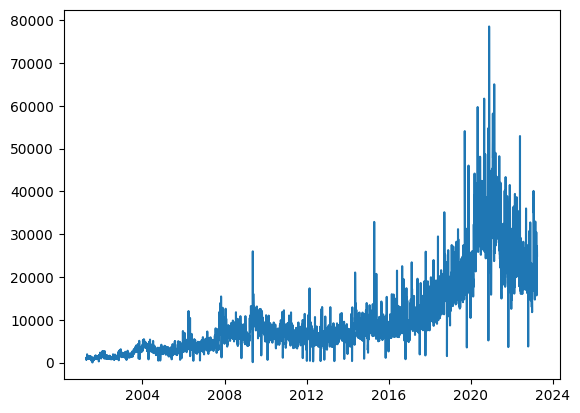

In [38]:
plt.plot(df['Date'], df['Turnover (Rs. Cr)'])  # Plot the chart
plt.show()

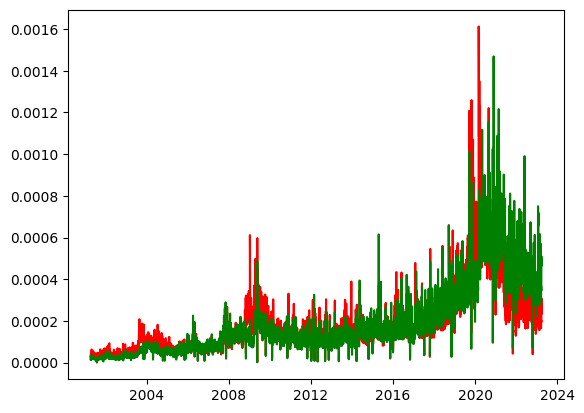

In [39]:
plt.plot(df['Date'], df['Shares Traded']/sum(df['Shares Traded']), color = 'r', label = 'share')
plt.plot(df['Date'], df['gap-per']/(sum(df['gap-per']*100)), color = 'y', label = 'share')
plt.plot(df['Date'], df['Turnover (Rs. Cr)']/sum(df['Turnover (Rs. Cr)']), color = 'g', label = 'turnover')  # Plot the chart
plt.show()

In [40]:
import matplotlib.pyplot as plt

(0.0, 410.0)

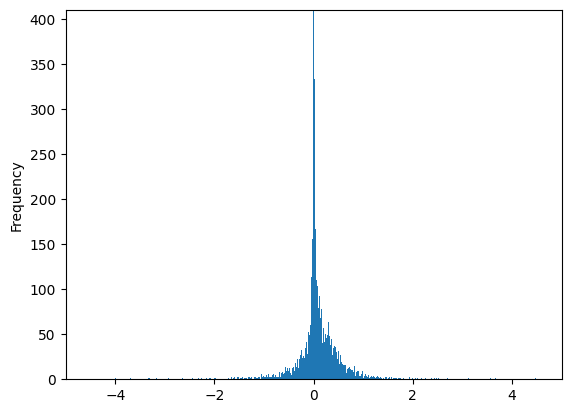

In [41]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-5,5)
plt.ylim(0,410)

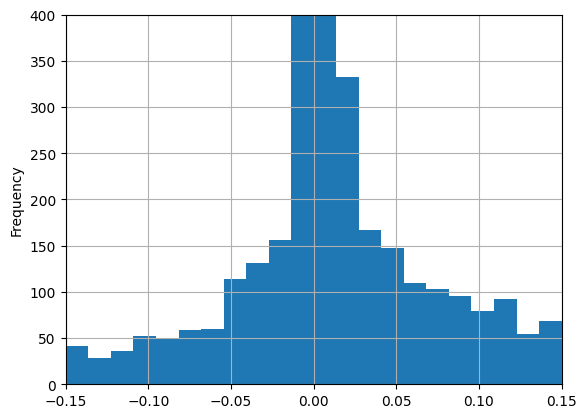

In [42]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-.15,.15)
plt.ylim(0,400)
plt.grid(True)
plt.show()

(0.0, 5.0)

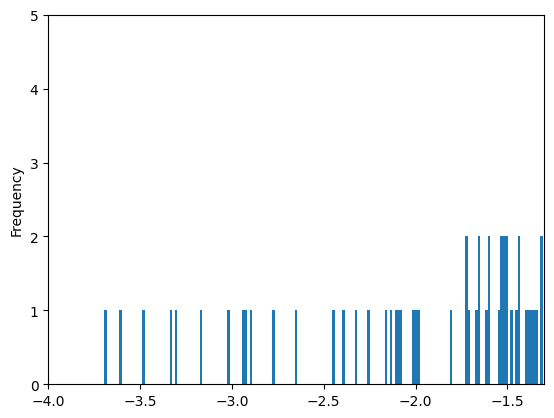

In [43]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-4,-1.3)
plt.ylim(0,5)

(0.0, 5.0)

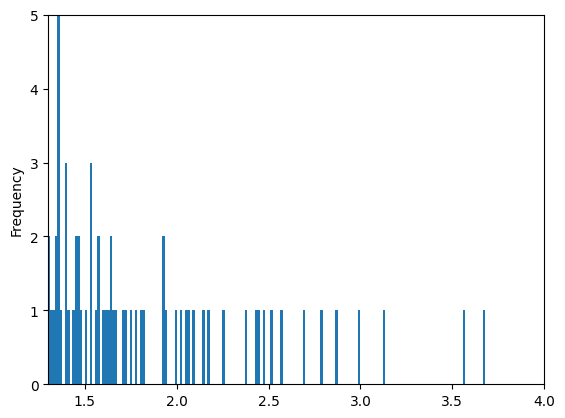

In [44]:
histo = ax.plot.hist(bins=1000)
plt.xlim(1.3, 4)
plt.ylim(0,5)

In [45]:
#turnover
#holiday - > just immediate one
#ok just note. prev. close - todays low -> candlestick thing
#interest rate, discount upone that , also the interest rate

#new ideas
'''
1.make a new holidays column, and note down the number of holidays, this particular day has had.. and also make different dataframes first with normalization and the second with different categorization based upon the number of holidays.
2.quaterly.. analyze the months during the financial earning releases by the company
3.analyze months of important days, election, demonitization, etc.
4.take into account market behaviour based upon the cycles of different secotors of stocks, i.e. banking metals commodity auto etc.

'''

'\n1.make a new holidays column, and note down the number of holidays, this particular day has had.. and also make different dataframes first with normalization and the second with different categorization based upon the number of holidays.\n2.quaterly.. analyze the months during the financial earning releases by the company\n3.analyze months of important days, election, demonitization, etc.\n4.take into account market behaviour based upon the cycles of different secotors of stocks, i.e. banking metals commodity auto etc.\n\n'

In [46]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,0.00,0.000,NaN,NaN,NaN,NaN
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-3.15,-0.274,NaN,NaN,NaN,NaN
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,0.90,0.079,NaN,NaN,NaN,NaN
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,-2.00,-0.176,NaN,NaN,NaN,NaN
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,0.75,0.066,1138.39,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,129.65,0.759,17008.01,17218.9375,17829.5136,17332.9734


In [47]:
a = df['Date'].to_numpy()

In [48]:
b = np.insert(a,0,0)
c = np.delete(b,len(b)-1)
df['temp'] = c

In [49]:
df['Holiday'] = df['Date'] - df['temp']

In [50]:
a = df['Holiday'].dt.days

In [51]:
df['Holiday'] = a -1

In [52]:
df['Holiday'][0] = 0
df

<ipython-input-52-7230261df57b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][0] = 0


,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,NaN,NaN,NaN,NaN,0
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-3.15,-0.274,NaN,NaN,NaN,NaN,0
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,0.90,0.079,NaN,NaN,NaN,NaN,0
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,-2.00,-0.176,NaN,NaN,NaN,NaN,1
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,0.75,0.066,1138.39,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920,0
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438,2
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386,0
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,129.65,0.759,17008.01,17218.9375,17829.5136,17332.9734,0


(array([4.168e+03, 0.000e+00, 1.710e+02, 0.000e+00, 1.012e+03, 0.000e+00,
        1.080e+02, 0.000e+00, 1.000e+01, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

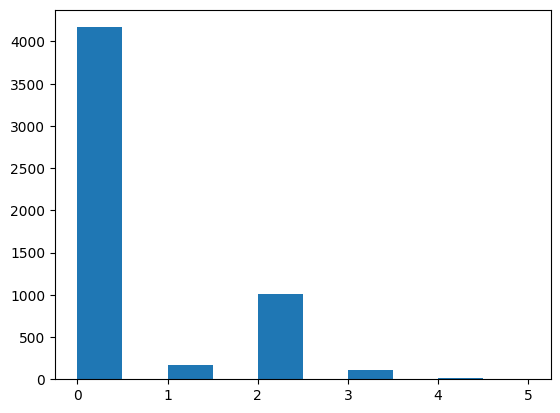

In [53]:
plt.hist(df['Holiday'])

In [54]:
df['Holiday'].value_counts()

0    4168
2    1012
1     171
3     108
4      10
5       1
Name: Holiday, dtype: int64

In [55]:
df5 = df.index[df['Holiday']==5].to_list()
df5

[3370]

In [56]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,NaN,NaN,NaN,NaN,0
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-3.15,-0.274,NaN,NaN,NaN,NaN,0
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,0.90,0.079,NaN,NaN,NaN,NaN,0
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,-2.00,-0.176,NaN,NaN,NaN,NaN,1
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,0.75,0.066,1138.39,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920,0
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438,2
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386,0
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,129.65,0.759,17008.01,17218.9375,17829.5136,17332.9734,0


In [57]:
df["target"]= (df["gap-per"]>0.05).astype(int)

In [58]:
df


,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,NaN,NaN,NaN,NaN,0,0
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-3.15,-0.274,NaN,NaN,NaN,NaN,0,0
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,0.90,0.079,NaN,NaN,NaN,NaN,0,1
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,-2.00,-0.176,NaN,NaN,NaN,NaN,1,0
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,0.75,0.066,1138.39,NaN,NaN,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920,0,1
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438,2,1
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386,0,1
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,129.65,0.759,17008.01,17218.9375,17829.5136,17332.9734,0,1


In [59]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-59-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Unnamed: 0,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target
Unnamed: 0,1.000000,0.947019,0.947118,0.946904,0.946967,0.653414,0.775212,0.130128,0.098157,0.947088,0.947468,0.951328,0.955933,0.007589,0.393147
Open,0.947019,1.000000,0.999941,0.999914,0.999862,0.590275,0.797255,0.124624,0.081338,0.999842,0.998844,0.991883,0.984467,0.005310,0.346048
High,0.947118,0.999941,1.000000,0.999890,0.999935,0.592123,0.798831,0.124788,0.081444,0.999851,0.998944,0.992146,0.984776,0.005443,0.346299
Low,0.946904,0.999914,0.999890,1.000000,0.999933,0.587622,0.795141,0.125535,0.082195,0.999748,0.998627,0.991550,0.984116,0.004858,0.346482
Close,0.946967,0.999862,0.999935,0.999933,1.000000,0.589889,0.797087,0.125480,0.082044,0.999765,0.998735,0.991799,0.984393,0.005173,0.346753
Shares Traded,0.653414,0.590275,0.592123,0.587622,0.589889,1.000000,0.879340,0.078182,0.046990,0.589983,0.589535,0.584245,0.585814,-0.028801,0.230769
Turnover (Rs. Cr),0.775212,0.797255,0.798831,0.795141,0.797087,0.879340,1.000000,0.137044,0.091432,0.796695,0.794947,0.784904,0.778060,-0.024035,0.277955
gap,0.130128,0.124624,0.124788,0.125535,0.125480,0.078182,0.137044,1.000000,0.921961,0.124441,0.122259,0.118184,0.116030,0.012992,0.505447
gap-per,0.098157,0.081338,0.081444,0.082195,0.082044,0.046990,0.091432,0.921961,1.000000,0.080928,0.079068,0.075542,0.075018,0.010341,0.553584
5-day SMA,0.947088,0.999842,0.999851,0.999748,0.999765,0.589983,0.796695,0.124441,0.080928,1.000000,0.999225,0.992334,0.984915,0.005085,0.346845


In [60]:
! pip install --upgrade ta

In [61]:
import ta

In [62]:
from ta import add_all_ta_features
from ta.utils import dropna

In [63]:
from ta.momentum import RSIIndicator

In [64]:
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

In [65]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target,RSI
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,NaN,NaN,NaN,NaN,0,0,NaN
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-3.15,-0.274,NaN,NaN,NaN,NaN,0,0,NaN
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,0.90,0.079,NaN,NaN,NaN,NaN,0,1,NaN
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,-2.00,-0.176,NaN,NaN,NaN,NaN,1,0,NaN
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,0.75,0.066,1138.39,NaN,NaN,NaN,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920,0,1,35.553580
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438,2,1,37.375231
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386,0,1,36.447260
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,129.65,0.759,17008.01,17218.9375,17829.5136,17332.9734,0,1,42.300765


In [66]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

Unnamed: 0             0
Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Shares Traded          0
Turnover (Rs. Cr)      0
temp                   0
gap                    1
gap-per                1
5-day SMA              4
1-month SMA           19
6-month SMA          124
1-year SMA           249
Holiday                0
target                 0
RSI                   13
dtype: int64

In [67]:
df.dropna()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target,RSI
249,249,2002-04-03,1136.60,1136.90,1121.45,1123.50,39862825,1031.04,2002-04-02,0.55,0.049,1130.46,1153.5700,1074.4156,1077.7000,0,0,41.383285
250,250,2002-04-04,1124.05,1149.65,1123.90,1145.90,49472486,1388.14,2002-04-03,0.15,0.013,1134.97,1151.9400,1076.3020,1077.7312,0,0,50.445696
251,251,2002-04-05,1146.05,1153.30,1139.90,1141.95,40192567,1133.81,2002-04-04,-0.05,-0.004,1137.45,1150.4075,1078.2404,1077.7020,0,0,49.006855
252,252,2002-04-08,1141.90,1147.90,1134.00,1135.25,31263947,916.74,2002-04-05,-0.10,-0.009,1136.71,1147.5175,1080.0292,1077.6964,2,0,46.579964
253,253,2002-04-09,1135.15,1137.45,1122.10,1126.70,37258542,1088.52,2002-04-08,0.00,0.000,1134.66,1144.4700,1081.7260,1077.6448,0,0,43.611892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,5464,2023-03-23,17097.40,17205.40,17045.30,17076.90,219171517,19676.97,2023-03-22,-0.70,-0.004,17084.95,17304.4650,17837.6552,17336.4944,0,0,38.967528
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920,0,1,35.553580
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438,2,1,37.375231
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386,0,1,36.447260


In [68]:
cormatrix=df.corr()

<ipython-input-68-341ffadcde26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormatrix=df.corr()


In [74]:
cormatrix["target"]

Unnamed: 0           0.393147
Open                 0.346048
High                 0.346299
Low                  0.346482
Close                0.346753
Shares Traded        0.230769
Turnover (Rs. Cr)    0.277955
gap                  0.505447
gap-per              0.553584
5-day SMA            0.346845
1-month SMA          0.347116
6-month SMA          0.338532
1-year SMA           0.337078
Holiday              0.012828
target               1.000000
RSI                 -0.011618
Name: target, dtype: float64

In [70]:
df.dropna(subset=['RSI'], inplace=True)
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target,RSI
13,13,2001-04-23,1144.05,1162.05,1137.30,1149.75,48547640,1202.06,2001-04-20,-0.15,-0.013,1121.72,NaN,NaN,NaN,2,0,58.947459
14,14,2001-04-24,1149.60,1149.60,1128.40,1146.30,42006905,1061.69,2001-04-23,0.20,0.017,1137.58,NaN,NaN,NaN,0,0,57.759994
15,15,2001-04-25,1146.50,1162.85,1142.30,1155.35,52927065,1273.51,2001-04-24,0.05,0.004,1147.97,NaN,NaN,NaN,0,0,60.034342
16,16,2001-04-26,1155.40,1170.20,1138.85,1143.75,55932790,1172.46,2001-04-25,-0.10,-0.009,1147.83,NaN,NaN,NaN,0,0,55.881058
17,17,2001-04-27,1143.65,1143.65,1078.10,1101.30,56498863,1255.92,2001-04-26,0.15,0.014,1139.29,NaN,NaN,NaN,0,0,43.909412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,39.25,0.232,17053.95,17276.1550,17832.1772,17335.2920,0,1,35.553580
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,46.05,0.271,17053.41,17252.1500,17829.4440,17334.3438,2,1,37.375231
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,25.60,0.151,17022.25,17230.1000,17828.9272,17333.5386,0,1,36.447260
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,129.65,0.759,17008.01,17218.9375,17829.5136,17332.9734,0,1,42.300765


In [71]:

from sklearn.ensemble import RandomForestClassifier as RFC

model = RFC(n_estimators = 100,min_samples_split=100,random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["RSI","Shares Traded","Holiday"]
model.fit(train[predictors],train["target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [72]:
x = test[predictors]
pred = model.predict(x)
y = test["target"]


In [73]:
from sklearn.metrics import precision_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision = precision_score(y,pred)
print(f'Precision: {precision}')

Precision: 0.6285714285714286
